In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv('train_norm.csv')
test_dataset=pd.read_csv('test_norm.csv')

In [3]:
dataset.head()

,pet_id,condition,color_type,length(m),X1,X2,breed_category,pet_category,issue_date_dt,listing_date_dt,date_diff,conditionnan,height(m),color_type_encode
0,ANSL_69903,0.666667,Brown Tabby,0.80,0.684211,1.000000,0.0,1,2016-07-10,2016-09-21,0.006719,0.0,0.061778,0.181818
1,ANSL_66892,0.333333,White,0.72,0.684211,1.000000,0.0,2,2013-11-21,2018-12-27,0.229314,0.0,0.204222,0.490909
2,ANSL_69750,1.000000,Brown,0.15,0.789474,0.444444,2.0,4,2014-09-28,2016-10-19,0.091203,1.0,0.797778,0.963636
3,ANSL_71623,0.333333,White,0.62,0.000000,0.111111,0.0,2,2016-12-31,2019-01-25,0.091576,0.0,0.284889,0.490909
4,ANSL_57969,0.666667,Black,0.50,0.947368,0.444444,0.0,1,2017-09-28,2017-11-19,0.004106,0.0,0.134667,0.472727


In [4]:
test_dataset.head()

,pet_id,condition,color_type,length(m),X1,X2,issue_date_dt,listing_date_dt,date_diff,conditionnan,height(m),color_type_encode
0,ANSL_75005,0.000000,Black,0.87,0.000000,0.777778,2005-08-17,2017-09-07,0.479965,0.0,0.838595,0.472727
1,ANSL_76663,0.333333,Orange Tabby,0.06,0.000000,0.111111,2018-11-15,2019-05-08,0.016860,0.0,0.037795,0.054545
2,ANSL_58259,0.333333,Black,0.24,0.000000,0.777778,2012-10-11,2018-04-02,0.216663,0.0,0.804802,0.472727
3,ANSL_67171,0.333333,Black,0.29,0.388889,0.111111,2015-02-13,2018-04-06,0.123495,0.0,0.076701,0.472727
4,ANSL_72871,0.333333,Brown,0.71,0.000000,0.777778,2017-01-18,2018-04-26,0.048500,0.0,0.576034,0.963636


In [5]:
#Capture dependent features
y_train=dataset[['pet_category', 'breed_category']]

In [6]:
X_train_first = dataset.copy()
X_test_first = test_dataset.copy()
y_train_first = y_train.copy()

In [7]:
X_train_first

,pet_id,condition,color_type,length(m),X1,X2,breed_category,pet_category,issue_date_dt,listing_date_dt,date_diff,conditionnan,height(m),color_type_encode
0,ANSL_69903,0.666667,Brown Tabby,0.80,0.684211,1.000000,0.0,1,2016-07-10,2016-09-21,0.006719,0.0,0.061778,0.181818
1,ANSL_66892,0.333333,White,0.72,0.684211,1.000000,0.0,2,2013-11-21,2018-12-27,0.229314,0.0,0.204222,0.490909
2,ANSL_69750,1.000000,Brown,0.15,0.789474,0.444444,2.0,4,2014-09-28,2016-10-19,0.091203,1.0,0.797778,0.963636
3,ANSL_71623,0.333333,White,0.62,0.000000,0.111111,0.0,2,2016-12-31,2019-01-25,0.091576,0.0,0.284889,0.490909
4,ANSL_57969,0.666667,Black,0.50,0.947368,0.444444,0.0,1,2017-09-28,2017-11-19,0.004106,0.0,0.134667,0.472727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18827,ANSL_51738,0.666667,Tricolor,0.44,0.000000,0.111111,0.0,2,2017-01-26,2018-03-09,0.048277,0.0,0.496889,0.800000
18828,ANSL_59900,1.000000,Brown,0.73,0.789474,0.444444,2.0,4,2016-06-18,2017-07-09,0.045664,1.0,0.205556,0.963636
18829,ANSL_53210,0.000000,Calico Point,0.99,0.684211,1.000000,1.0,1,2010-07-21,2018-08-22,0.365186,0.0,0.514000,0.290909
18830,ANSL_63468,0.000000,Tan,0.55,0.684211,1.000000,1.0,2,2017-05-12,2018-02-08,0.031479,0.0,0.884889,0.709091


In [8]:
num_features=[feature for feature in X_train_first.columns if X_train_first[feature].dtypes!='O' and feature != 'pet_category' and feature != 'breed_category']

for feature in num_features:
    X_train_first[feature]=(X_train_first[feature]-X_train_first[feature].min())/(X_train_first[feature].max()-X_train_first[feature].min())

In [9]:
X_train_first = X_train_first.drop(['pet_id','pet_category', 'breed_category', 'color_type', 'issue_date_dt', 'listing_date_dt'],axis=1)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train_first, y_train_first, test_size=0.30, random_state=42)

In [11]:
estimator = XGBClassifier(
    objective= "multi:softprob",
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [12]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [13]:
#grid_search.fit(X_train1,y_train['pet_category'])
#grid_search.best_estimator_

In [14]:
xgb_model_pet = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
xgb_model_pet.fit(X_train, y_train['pet_category'])

y_pred = xgb_model_pet.predict(X_train)

print(confusion_matrix(y_train['pet_category'], y_pred))

s1 = f1_score(y_train['pet_category'], y_pred, average='weighted')

y_val_pred = xgb_model_pet.predict(X_val)
s1_val = f1_score(y_val['pet_category'], y_val_pred, average='weighted')

s1, s1_val

[[  53    1    4    3]
 [   0 4444  556    6]
 [   0  238 7213    2]
 [   0    6   73  583]]


(0.9322031889783594, 0.9011286121522588)

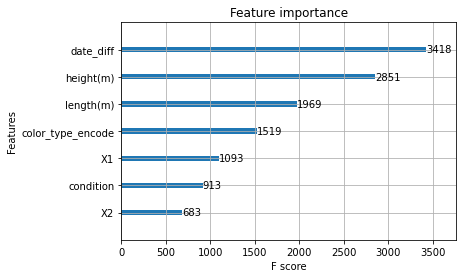

In [16]:
from xgboost import plot_importance
plot_importance(xgb_model_pet, )

In [17]:
y_pred_test = xgb_model_pet.predict(X_test_first[X_train.columns])

In [18]:
test_dataset['pet_category'] = y_pred_test

In [19]:
test_dataset.to_csv('C:/Pet-Adoption/predicted_test_pet.csv', index=False)

In [20]:
'''
score = 100 * ((s1_val+s22_val)/2)
score
'''

'\nscore = 100 * ((s1_val+s22_val)/2)\nscore\n'